# Importing libraries, df_act_cust_final & checking outcome

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.colors as mcolors

In [2]:
path=r'/Users/stefaniadaskalaki/Google Drive/CF4.2 Instacart Basket Analysis'

In [3]:
df_act_cust_final=pd.read_pickle(os.path.join(path, '02. Data', '02. Prepared Data', 'df_act_cust.final.pkl'))

## Setting wide option display for df and checking outcome

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
df_act_cust_final.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,frequency_order_median,frequency_order_median_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,exists,region,activity_flag,age_flag,income_flag,family_flag,department,shopping_basket
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity,Young adult,Low,Large family,"{'department_id': 8, 'department': 'pets'}",Non essentials
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity,Young adult,Low,Large family,"{'department_id': 8, 'department': 'pets'}",Non essentials
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity,Young adult,Low,Large family,"{'department_id': 8, 'department': 'pets'}",Non essentials
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity,Young adult,Low,Large family,"{'department_id': 8, 'department': 'pets'}",Non essentials
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity,Young adult,Low,Large family,"{'department_id': 8, 'department': 'pets'}",Non essentials


# QUESTION 3: Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts. 

## Converting the department dictionary to a list

In [4]:
def getdepartment(depdict):
    try:
        return depdict["department"]
    
    except:
        return "None"

In [5]:
getdepartment

<function __main__.getdepartment(depdict)>

In [6]:
df_act_cust_final['department'].apply(lambda x: getdepartment(x))

0           pets
1           pets
2           pets
3           pets
4           pets
            ... 
32404850    pets
32404851    pets
32404852    pets
32404853    pets
32404854    pets
Name: department, Length: 30964564, dtype: object

In [7]:
df_act_cust_final['department']=df_act_cust_final['department'].apply(lambda x: getdepartment(x))

In [8]:
df_act_cust_final['department'].value_counts(dropna=False)

alcohol            9079273
household          5177182
deli               2766406
pets               2571901
other              2121731
breakfast          1782705
produce            1120828
dairy eggs         1012074
missing            1003834
bulk                822136
babies              699857
pantry              674781
canned goods        670850
meat seafood        424306
snacks              410392
beverages           255991
international       144627
dry goods pasta      93060
None                 64768
bakery               34411
personal care        33451
Name: department, dtype: int64

## Creating a bar chart to illustrate changes in shopping_basket accross hour of the day

In [9]:
dept_hour = pd.crosstab(df_act_cust_final['order_hour_of_day'],df_act_cust_final[('shopping_basket')])

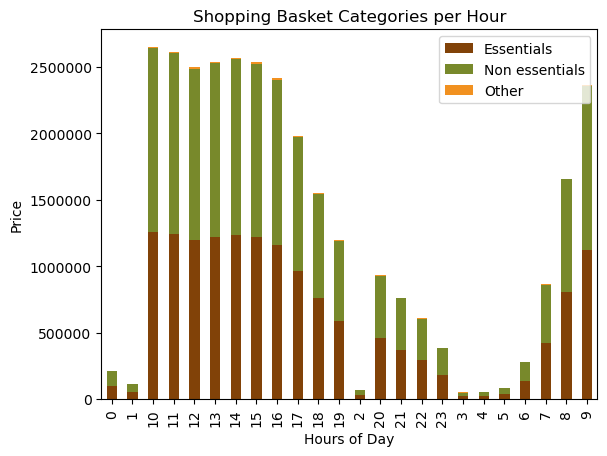

In [10]:
bar_dept_hour = dept_hour. plot(kind= 'bar', stacked = True, color=['#814208','#78892B','#F19120'])
plt.title('Shopping Basket Categories per Hour')
bar_dept_hour.legend(loc='upper right')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Hours of Day')
plt.ylabel('Price')
width = 0.20 

In [13]:
# exporting the chart

bar_dept_hour.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_dept_hour1.png'))

## Creating a bar chart to illustrate changes in age and spending

In [14]:
age_prange = pd.crosstab(df_act_cust_final['age_flag'],df_act_cust_final[('price_range_loc')])

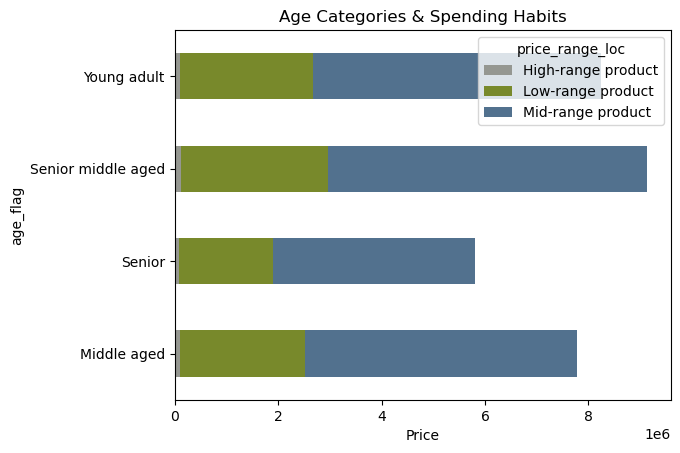

In [15]:
age_prange = age_prange. plot(kind= 'barh', stacked = True, color=['#959791','#78892B','#52718E'])
plt.title('Age Categories & Spending Habits')
bar_dept_hour.legend(loc='upper center')
plt.xlabel('Price')
width = 0.20 

In [16]:
# exporting the chart

age_prange.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_age_prange2.png'))

## Creating a bar chart to illustrate differences in gender and purchasing habits

In [17]:
gender_prange = pd.crosstab(df_act_cust_final['gender'],df_act_cust_final[('price_range_loc')])

Text(0.5, 0, 'Gender')

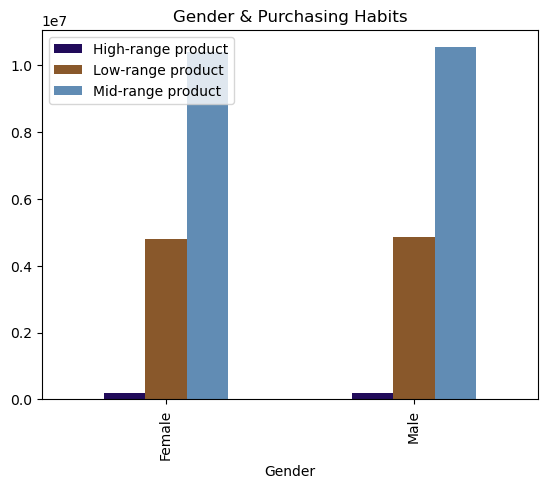

In [18]:
gender_prange = gender_prange.plot.bar(color=['#210B5A','#89582B','#618CB4'])
plt.title('Gender & Purchasing Habits')
plt.legend(loc='upper left')
plt.xlabel('Gender')

In [19]:
# exporting the chart

gender_prange.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_gender_prange3.png'))

## QUESTION 5: The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example: 
●  What’s the distribution among users in regards to their brand loyalty (i.e., how 
often do they return to Instacart)? 
●  Are there differences in ordering habits based on a customer’s loyalty status? 
●  Are there differences in ordering habits based on a customer’s region? 
●  Is there a connection between age and family status in terms of ordering habits? 

### Creating a bar chart investigating the distribution among users in regards to their  loyalty status and family status

In [20]:
fam_loyal = pd.crosstab(df_act_cust_final['fam_status'],df_act_cust_final[('loyalty_flag')])

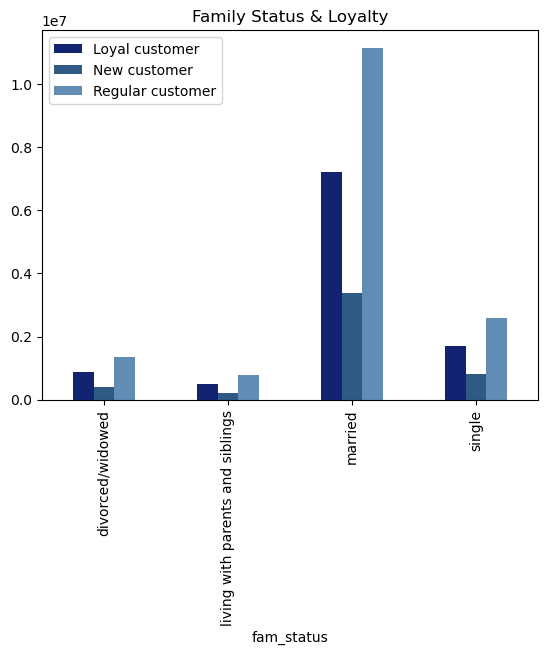

In [21]:
fam_loyal = fam_loyal.plot.bar(color=['#122371','#2F5A83','#618CB4'])
plt.title('Family Status & Loyalty')
plt.legend(loc='upper left')

In [22]:
# exporting the chart

fam_loyal.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_fam_loyal4.png'))

### Creating a bar chart investigating the distribution among users in regards to their  loyalty status and age group

In [28]:
age_loyal = pd.crosstab(df_act_cust_final['age_flag'],df_act_cust_final[('loyalty_flag')])

In [33]:
age_loyal.to_clipboard()

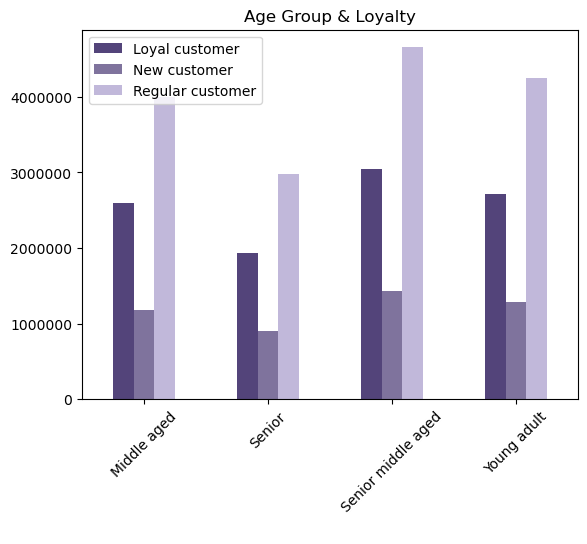

In [29]:
age_loyal = age_loyal.plot.bar(color=['#53447A','#7F739D','#C1B8DA'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Age Group & Loyalty')
plt.xticks(rotation = 45)
plt.xlabel(' ')
plt.legend(loc='upper left')
plt.show()

In [22]:
# exporting the chart

age_loyal.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'age_loyal5.png'))

### Creating a bar chart investigating the distribution among users in regards to their  family status and spending

In [26]:
fam_spend = pd.crosstab(df_act_cust_final['fam_status'],df_act_cust_final[('spending_flag')])

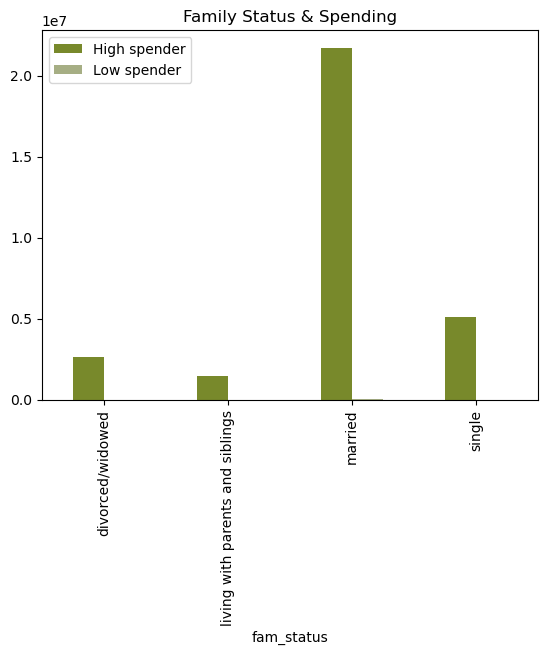

In [27]:
fam_spend = fam_spend.plot.bar(color=['#78892B','#A6AE84'])
plt.title('Family Status & Spending')
plt.legend(loc='upper left')

In [28]:
# exporting the chart

fam_spend.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'fam_spend6.png'))

### Creating a bar chart investigating the distribution among users in regards to their  family status and region

In [29]:
fam_region = pd.crosstab(df_act_cust_final['fam_status'],df_act_cust_final[('region')])

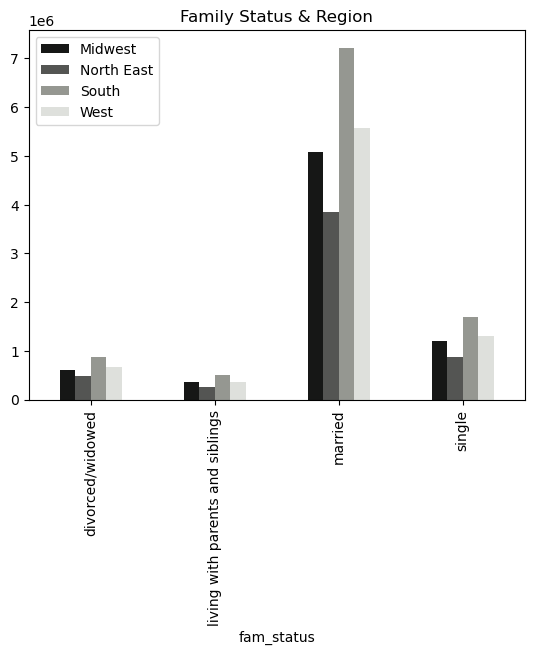

In [30]:
fam_region = fam_region.plot.bar(color=['#161716','#545553','#959791','#DEE0DC'])
plt.title('Family Status & Region')
plt.legend(loc='upper left')

In [31]:
# exporting the chart

fam_region.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'fam_region7.png'))

# QUESTION 4: Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders. 

## Creating a bar chart investigating the distribution among users in regards to their age and dept

In [32]:
bar_age_dpt=pd.crosstab(df_act_cust_final['department'], df_act_cust_final['age_flag'])

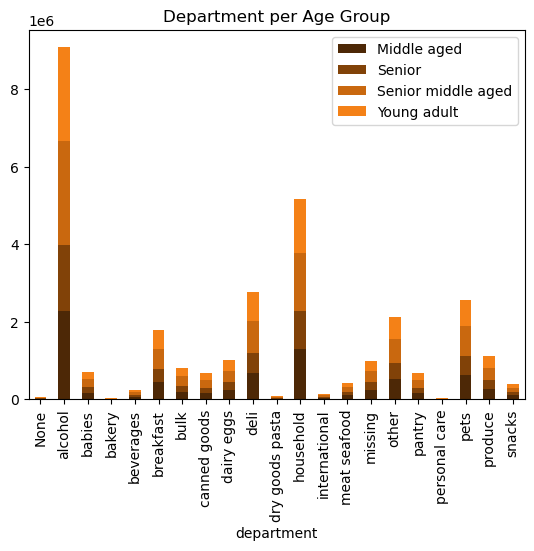

In [33]:
bar_age_dpt = bar_age_dpt. plot(kind= 'bar', stacked = True, color=['#4D2806','#814208','#C9680F','#F48117'])
plt.title('Department per Age Group')
bar_age_dpt.legend(loc='upper right')
plt.xlabel('department')
width = 0.20 

In [34]:
# exporting the chart

bar_age_dpt.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_age_dpt8.png'))

## Creating a bar chart investigating the distribution among users in regards to their fam_status and dept

In [35]:
bar_fam_dpt=pd.crosstab(df_act_cust_final['department'], df_act_cust_final['fam_status'])

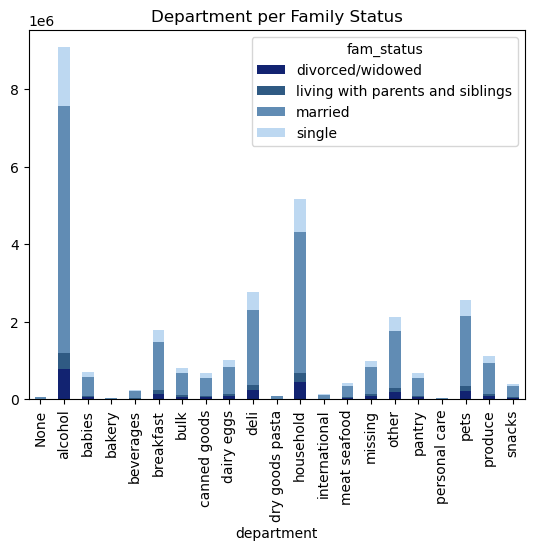

In [36]:
bar_fam_dpt = bar_fam_dpt. plot(kind= 'bar', stacked = True, color=['#122371','#2F5A83','#618CB4','#BDD8F1'])
plt.title('Department per Family Status')
bar_age_dpt.legend(loc='upper right')
plt.xlabel('department')
width = 0.20 

In [37]:
# exporting the chart

bar_fam_dpt.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_fam_dpt9.png'))

## Creating a bar chart investigating the distribution among departments and price range

In [18]:
bar_dpt_pr=pd.crosstab(df_act_cust_final['department'], df_act_cust_final['price_range_loc'])

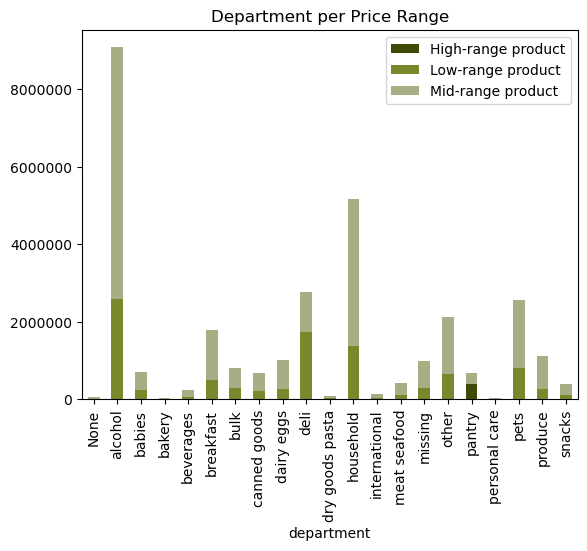

In [19]:
bar_dpt_pr = bar_dpt_pr. plot(kind= 'bar', stacked = True, color=['#3E4B06','#78892B','#A6AE84','#EFF1E5'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Department per Price Range')
bar_dpt_pr.legend(loc='upper right')
width = 0.20 

In [40]:
# exporting the chart

bar_dpt_pr.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_dpt_pr10.png'))

## Creating a bar chart investigating the distribution among departments and shopping basket habits

In [22]:
bar_dpt_shop=pd.crosstab(df_act_cust_final['department'], df_act_cust_final['shopping_basket'])

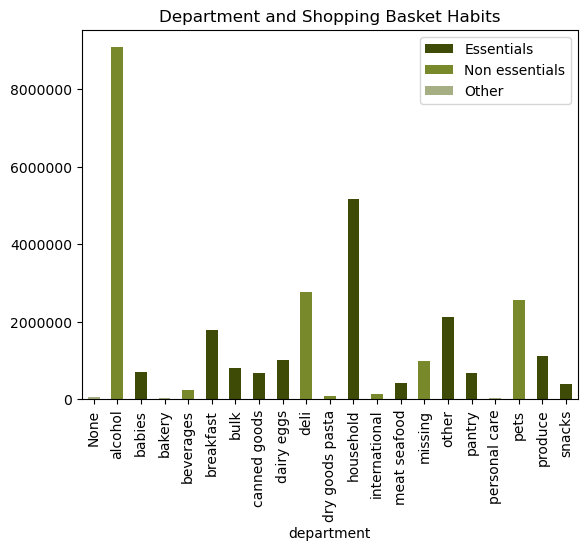

In [23]:
bar_dpt_shop = bar_dpt_shop. plot(kind= 'bar', stacked = True, color=['#3E4B06','#78892B','#A6AE84','#EFF1E5'])
plt.title('Department and Shopping Basket Habits')
plt.ticklabel_format(style='plain', axis='y')
bar_dpt_shop.legend(loc='upper right')
plt.xlabel('department')
width = 0.20 

In [43]:
# exporting the chart

bar_dpt_shop.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_dpt_shop11.png'))

## Creating a bar chart investigating the distribution among family status and age group to better define our customer profiles

In [44]:
bar_fam_age=pd.crosstab(df_act_cust_final['fam_status'], df_act_cust_final['age_flag'])

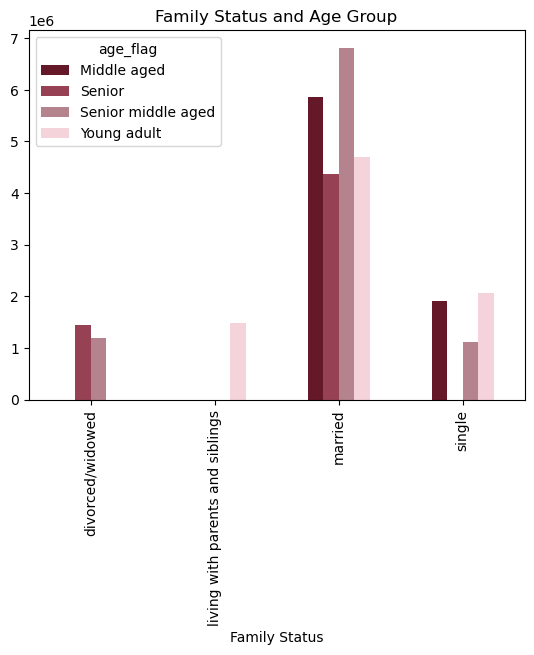

In [45]:
bar_fam_age = bar_fam_age. plot(kind= 'bar', color=['#641828','#964254','#b5838d','#F4D3DA'])
plt.title('Family Status and Age Group')
bar_age_dpt.legend(loc='upper right')
plt.xlabel('Family Status')
width = 0.20 

In [46]:
# exporting the chart

bar_fam_age.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_fam_age12.png'))

## Creating a bar chart investigating the distribution among family size and age group to better define our customer profiles

In [53]:
bar_fam_age2=pd.crosstab(df_act_cust_final['family_flag'], df_act_cust_final['age_flag'])

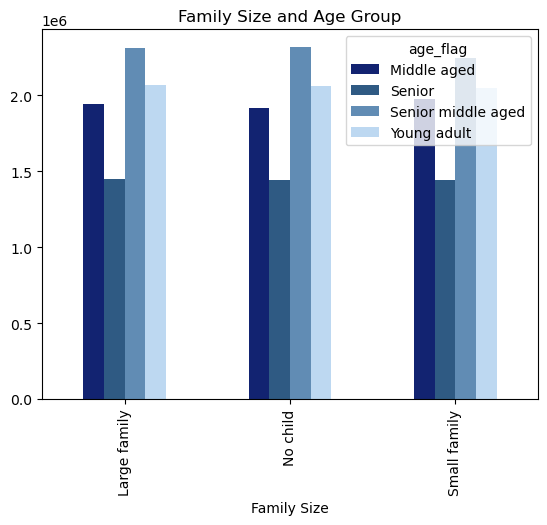

In [54]:
bar_fam_age2 = bar_fam_age2. plot(kind= 'bar', color=['#122371','#2F5A83','#618CB4','#BDD8F1'])
plt.title('Family Size and Age Group')
bar_age_dpt.legend(loc='upper right')
plt.xlabel('Family Size')
width = 0.20 

In [55]:
# exporting the chart

bar_fam_age2.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_fam_age213.png'))

## Creating a bar chart investigating the distribution among age groups and income to better define our customer profiles

In [56]:
bar_age_income=pd.crosstab(df_act_cust_final['age_flag'], df_act_cust_final['income_flag'])

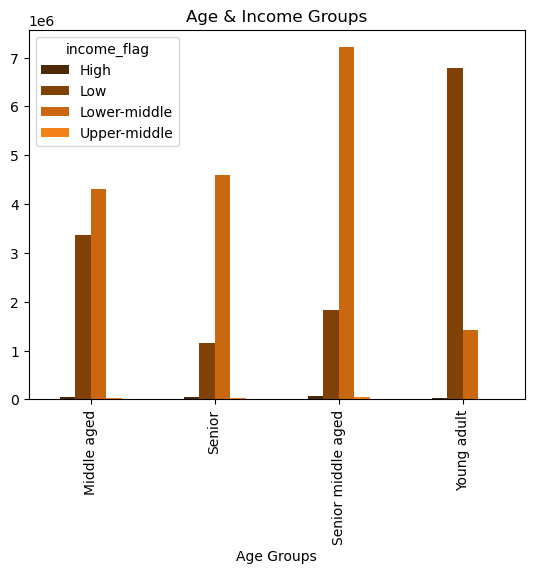

In [57]:
bar_age_income = bar_age_income. plot(kind= 'bar', color=['#4D2806','#814208','#C9680F','#F48117'])
plt.title('Age & Income Groups')
bar_age_dpt.legend(loc='upper right')
plt.xlabel('Age Groups')
width = 0.20 

In [58]:
# exporting the chart

bar_age_income.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'bar_age_income14.png'))